In [14]:
import numpy as np

from comfortSIM import metrics, utils, visualize, classes

In [15]:
env = classes.Environment()
env.load_parameter('air_temperature', 'data/sample-data/csv/air_temperature.csv')
env.load_parameter('relative_humidity', 'data/sample-data/csv/relative_humidity.csv')
env.load_parameter('mean_radiant_temperature', 'data/sample-data/csv/mean_radiant_temperature.csv')

Shape set to (60, 8760) based on air_temperature


In [16]:
pmv_comfort = classes.PMV(env)
pmv_comfort.calculate_comfort_index()  
print(f'Shape of comfort result array: {pmv_comfort.get_comfort_index().shape}')
print("Annual Spatial Autonomies (80% area threshold):")
print(f'{pmv_comfort.index}: {pmv_comfort.calculate_spatial_autonomy().annual_autonomy}')

Shape of comfort result array: (60, 8760)
Annual Spatial Autonomies (80% area threshold):
PMV: 0.47


In [17]:
mrt_array = env.get_parameter('mean_radiant_temperature')
print(f'Array shape: {mrt_array.shape}')

Array shape: (60, 8760)


In [18]:
print("Arrays of hourly and annual heterogeneity:")
print(f"Hourly spatial heterogeneity: {metrics.calculate_hourly_spatial_heterogeneity(mrt_array).shape}")
print(f"Annual point heterogeneity: {metrics.calculate_annual_point_heterogeneity(mrt_array).shape}")

Arrays of hourly and annual heterogeneity:
Hourly spatial heterogeneity: (8760,)
Annual point heterogeneity: (60,)


In [19]:
print("THI: Spatial thermal heterogeneity indices")
print(f"THI_area: {metrics.calculate_thi_area(mrt_array)}°C")
print(f"THI_point: {metrics.calculate_thi_point(mrt_array)}°C")

THI: Spatial thermal heterogeneity indices
THI_area: 0.83°C
THI_point: 23.1°C


In [20]:
# apply working hours filter

print(
    f"Shape of annual array: {metrics.calculate_hourly_spatial_heterogeneity(mrt_array).shape}"
)
print(
    f"Shape of filtered array: {utils.filter_by_schedule(metrics.calculate_hourly_spatial_heterogeneity(mrt_array)).shape}"
)

Shape of annual array: (8760,)
Shape of filtered array: (2610,)


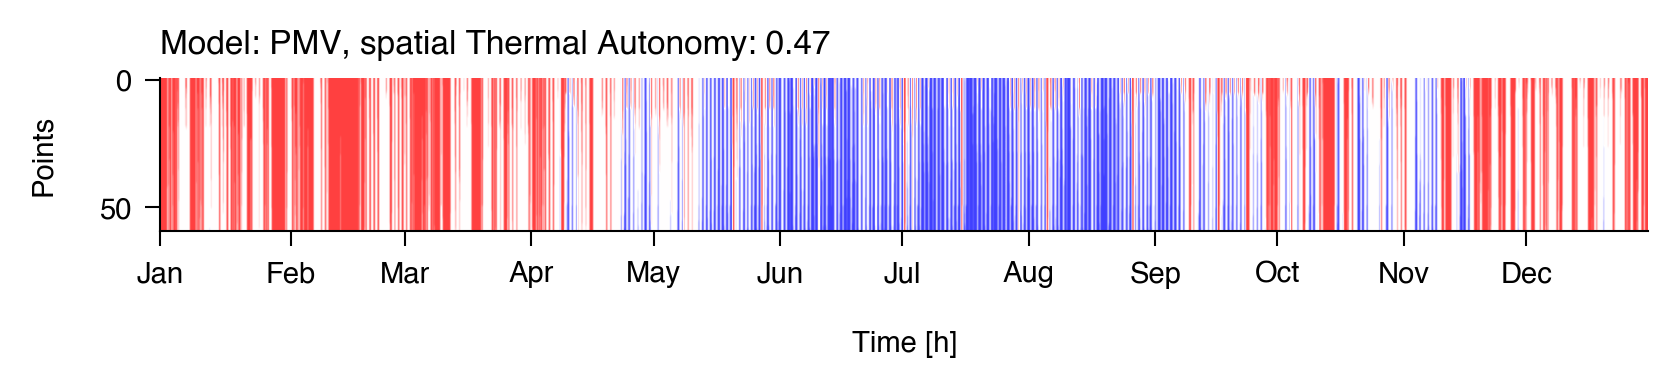

In [21]:
visualize.plot_hourly_autonomy(pmv_comfort.get_comfort_index(), "PMV")

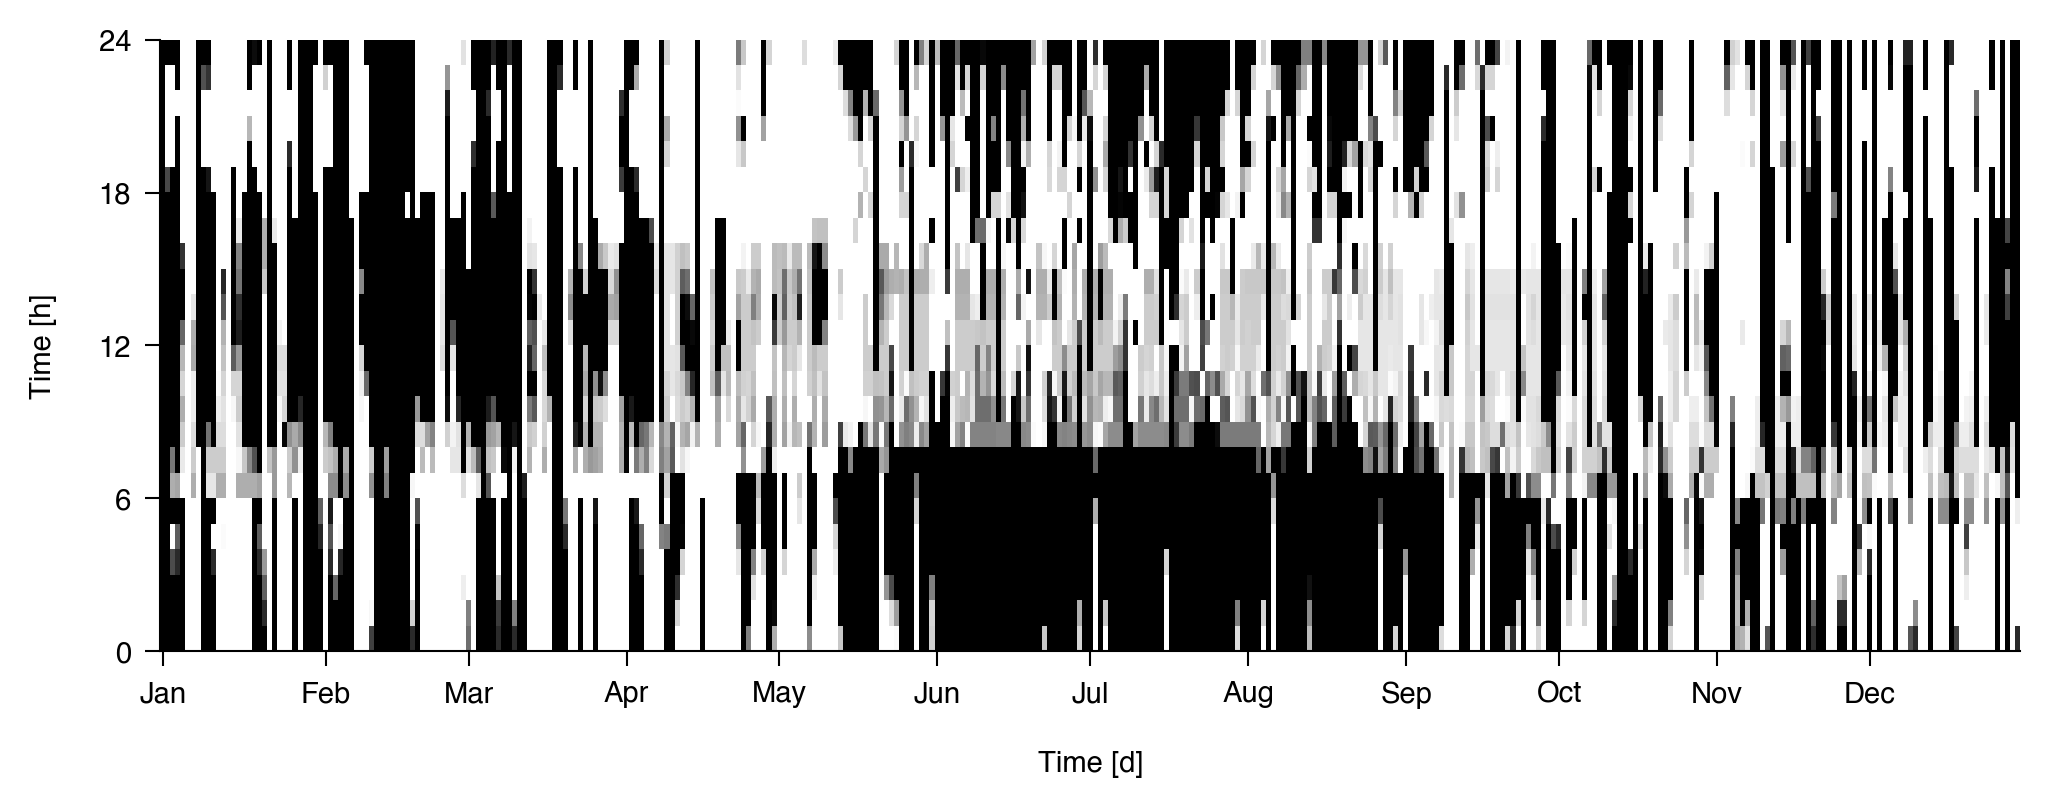

In [27]:
visualize.plot_daily_autonomy(pmv_comfort.calculate_spatial_autonomy().hourly_autonomy)